# XGBoost Model
This is by far the most accurate modelling technique for structed data. We will use a datapipeline for this as well. This improves future flexibility of the model.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import numpy as np

In [54]:
import pandas as pd
import xgboost as xgb
import sys
sys.path.append('../')
from dataflow import Flow

my_flow = Flow(None, None, None, csv_path='../neural_network/csv/preselected_feat_v5.1.0_equalRatio_restrictedSideband.csv')
all_data = my_flow.get_combined_data()
(X_train, y_train), (X_val, y_val), (X_test, y_test) = my_flow.get_train_val_test_split()

In [36]:
def plot_prob_dist(probs, bins, savefig=None):
    probs = list(probs)
    labels = ['Train', 'Validation', 'Test']
    colours = ['b', 'r', 'g']
    
    fig, ax = plt.subplots(1, 1, figsize=(7, 6))
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    fonts = {'fontname':'Arial'}
    
    for i, p in enumerate(probs):
        ax.hist(p, bins=bins, histtype='step', label=labels[i], density=True, color=colours[i], linewidth=2)
    
    plt.ylabel('Normalised Frequency', horizontalalignment='right', y=1.0, fontsize=14, **fonts)
    plt.xlabel('Probability', horizontalalignment='right', x=1.0, fontsize=14, **fonts)
    plt.legend(loc='upper right', bbox_to_anchor=(0.7, 0.95), ncol=1, fancybox=False, shadow=True, frameon=False)
    if savefig != None:
        plt.savefig(savefig)
    plt.show()

## Define the Model
Now we have our data (the same as was used by the neural network) we try to see how well we can get this to perform. We will be using an XGBClassifier. This is by far the best method to use for this binary classification problem. 

In [55]:
feature_cols = [f for f in all_data.columns.to_list() if f != 'category']
data_dmatrix = xgb.DMatrix(data=all_data[feature_cols], label=all_data.category)

In [65]:
# Parameters for the model
params = {
    'objective': 'binary:logistic',
    'max_depth': 6,
    'learning_rate': 0.05,
    'n_estimators': 1000,
    'eval_metric': ['auc', 'logloss'],
    'use_label_encoder': False,
}

# Instantiate the classifier
xgb_clf = xgb.XGBClassifier(**params)

# Fit the classifier to the training data
xgb_clf.fit(X_train, y_train, eval_set=[(X_val, y_val)])

[0]	validation_0-auc:0.95710	validation_0-logloss:0.65808
[1]	validation_0-auc:0.95975	validation_0-logloss:0.62626
[2]	validation_0-auc:0.96384	validation_0-logloss:0.59730
[3]	validation_0-auc:0.96511	validation_0-logloss:0.57085
[4]	validation_0-auc:0.96693	validation_0-logloss:0.54639
[5]	validation_0-auc:0.96874	validation_0-logloss:0.52406
[6]	validation_0-auc:0.96974	validation_0-logloss:0.50335
[7]	validation_0-auc:0.97042	validation_0-logloss:0.48436
[8]	validation_0-auc:0.97096	validation_0-logloss:0.46651
[9]	validation_0-auc:0.97166	validation_0-logloss:0.44984
[10]	validation_0-auc:0.97198	validation_0-logloss:0.43440
[11]	validation_0-auc:0.97241	validation_0-logloss:0.42010
[12]	validation_0-auc:0.97289	validation_0-logloss:0.40661
[13]	validation_0-auc:0.97327	validation_0-logloss:0.39415
[14]	validation_0-auc:0.97362	validation_0-logloss:0.38241
[15]	validation_0-auc:0.97415	validation_0-logloss:0.37122
[16]	validation_0-auc:0.97462	validation_0-logloss:0.36072
[17]	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              eval_metric=['auc', 'logloss'], gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=32, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [68]:
# Check the accuracy score
from sklearn.metrics import accuracy_score, roc_auc_score

y_pred = xgb_clf.predict(X_val)
acc, roc_auc = accuracy_score(y_val, y_pred), roc_auc_score(y_val, y_pred)
print(f'Primitive Model Accuracy: {acc:.4f}\nPrimitive Model ROC-AUC: {roc_auc:.4f}')

Primitive Model Accuracy: 0.9466
Primitive Model ROC-AUC: 0.9465


/cvmfs/lhcbdev.cern.ch/conda/envs/default/2021-09-07_04-06/linux-64/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


## Feature Importance Analysis

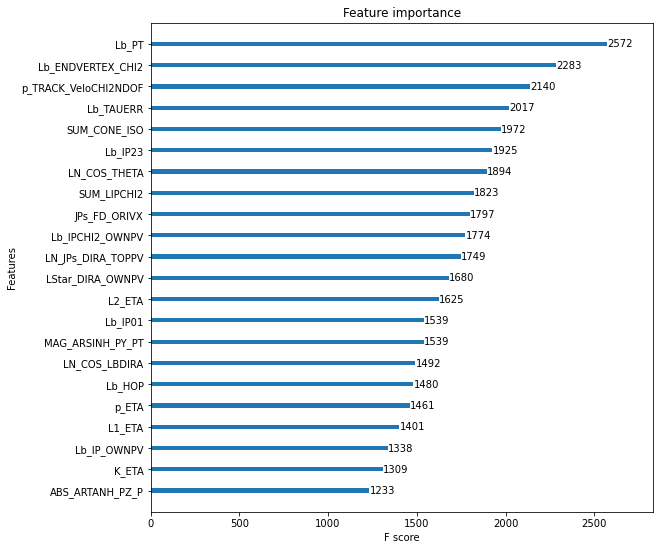

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
xgb.plot_importance(xgb_clf, ax=ax, grid=False)
plt.savefig('../../images/MLModels/feature_importance_xgb_v5.1.0.png')
plt.show()

In [62]:
y_pred_probs_test = xgb_clf.predict_proba(X_test)
y_pred_probs_val = xgb_clf.predict_proba(X_val)
y_pred_probs_train = xgb_clf.predict_proba(X_train)

/cvmfs/lhcbdev.cern.ch/conda/envs/default/2021-09-07_04-06/linux-64/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


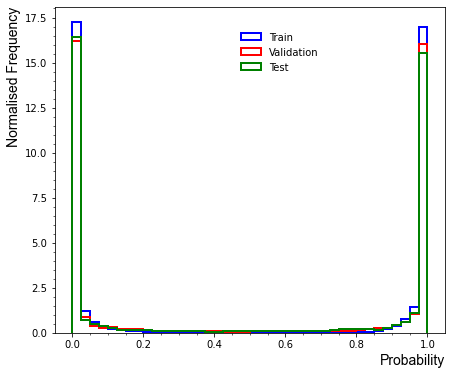

In [63]:
probs = [
    y_pred_probs_train[:,1],
    y_pred_probs_val[:,1],
    y_pred_probs_test[:,1]
]

plot_prob_dist(probs, np.linspace(0, 1, 41), savefig='../../images/MLModels/XGB_v5.1.0_ProbDist.png')